# Workforce Analytics: Understanding and Reducing Employee Attrition

# __Overview__
1. Importing Libraries
2. IDA ( Initial Data Analysis)
- Importing Original Dataset
-  Data Quality Check
3. EDA (Exploratory Data Analysis)
- Describe()
- Dropping irrelevant columns
- Filling Missing Values
- Data Imputation
- Datatype Conversion
4. Analysis & Visualisation
- Plots
- Summary
5. Conclusion

# __Importing Libraries & Dataset__

In [1]:
import pandas as pd # Used for data manipulation and analysis, including data cleaning, transformation, and aggregation.
import numpy as np #Applied for numerical computations, including efficient handling of large arrays and matrices, and performing mathematical operations
import seaborn as sns # Utilized for creating statistical data visualizations with high-level, aesthetically pleasing graphs.
import matplotlib.pyplot as plt # Employed for comprehensive plotting with detailed customization of static, animated, and interactive visualizations.



# __Initial Data Analysis__
- Data Understanding
- Dataframe Shape
- Data Types
- Column Description

In [2]:
df = pd.read_csv('/content/sample_data/Employee_data.csv') # Importing CSV File

In [3]:
df # Checking Data Frame


,ID,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
0,1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,...,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.000000
1,2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,...,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.000000
2,3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,...,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.000000
3,4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,...,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.000000
4,5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100,9101,66.07300,0,male,0,23,350,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,1.099854,131.0,7.459961,188.0,21.0,NaN,NaN,0.0,NaN,0.000000
9101,9102,55.15399,0,female,0,29,347,Coma,Coma,1,...,5.899414,135.0,7.289062,190.0,49.0,0.0,NaN,0.0,NaN,0.000000
9102,9103,70.38196,0,male,0,8,346,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,2.699707,139.0,7.379883,189.0,60.0,3900.0,NaN,NaN,NaN,2.525391
9103,9104,47.01999,1,male,1,7,7,MOSF w/Malig,ARF/MOSF,1,...,3.500000,135.0,7.469727,246.0,55.0,NaN,NaN,0.0,<2 mo. follow-up,0.000000


In [4]:
dup_df = df.duplicated()

In [5]:
df[dup_df] # Checking duplicatrd values

,ID,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc


In [6]:
df.shape #Dimension of Dataset

(9105, 48)

In [7]:
df.columns # Displaying all columns of Data

Index(['ID', 'age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
       'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
       'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls', 'sfdm2',
       'adlsc'],
      dtype='object')

In [8]:
df.dtypes # Checking the data type of all columns

,0
ID,int64
age,float64
death,int64
sex,object
hospdead,int64
slos,int64
d.time,int64
dzgroup,object
dzclass,object
num.co,int64


In [9]:
#  checking for missing values in each column to assess which columns needs cleaning
missing_values = df.isnull().sum().sort_values(ascending=False)
# Displaying columns with missing values and their counts
missing_values[missing_values > 0]

,0
adlp,5641
urine,4862
glucose,4500
bun,4352
totmcst,3475
alb,3372
income,2982
adls,2867
bili,2601
pafi,2325


# __Exploratory Data Analysis__
- Describe()
- Dropping irrelevant columns
- Filling Missing Values
- Data Imputation
- Datatype Conversion

#### __Checking the percentage of blank values__

In [10]:
df['adlp'].isna().sum()

np.int64(5641)

In [11]:
5641*100/9105

61.954969796814936

In [12]:
df['glucose'].isna().sum()

np.int64(4500)

In [13]:
4500*100/9105

49.42339373970346

In [14]:
df['totmcst'].isna().sum()


np.int64(3475)

In [15]:
3475*100/9105

38.165842943437674

In [16]:
df['ph'].isna().sum()

np.int64(2284)

In [17]:
2284*100/9105

25.085118066996156

In [18]:
df['totcst'].isna().sum()

np.int64(888)

In [19]:
888*100/9105

9.752883031301483

In [20]:
df['charges'].isna().sum()

np.int64(172)

In [21]:
172*100/9105

1.8890719384953323

In [22]:
df['avtisst'].isna().sum()

np.int64(82)

In [23]:
82*100/9105

0.900604063701263

In [24]:
df['adls'].isna().sum()

np.int64(2867)

In [25]:
2867*100/9105

31.488193300384403

In [26]:
df['sfdm2'].isna().sum()

np.int64(1400)

In [27]:
1400*100/9105

15.376166941241076

In [28]:
df['prg2m'].isna().sum()

np.int64(1649)

In [29]:
1649*100/9105

18.11092806150467

In [30]:
df['prg6m'].isna().sum()

np.int64(1633)

In [31]:
1633*100/9105

17.935200439319054

In [32]:
df['income'].isna().sum()


np.int64(2982)

In [33]:
2892*100/9105

31.762767710049424

In [34]:
df.describe()
df['adlp'].describe()

,adlp
count,3464.000000
mean,1.157910
std,1.739672
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,7.000000


- ## __Dropping irrelevant columns__

In [35]:
# Dropping Education Column
col_drop=['edu','totmcst']
df= df.drop(columns=col_drop)

### Data Imputation

In [36]:
# Impute alb, pafi, bili, crea, bun, wblc and urine using given refernce in coursework brief
fill_values = {
    'alb': 3.5,
    'bili': 1.01,
    'crea':1.01,
    'bun': 6.51,
    'pafi': 333.3,
    'urine':2502,
    'wblc':9

} # Filling the values provided in dataset from the below link

- https://archive.ics.uci.edu/dataset/880/support2

In [37]:
df = df.fillna(value=fill_values)
empty_columns = ['scoma','aps','sps','surv2m','surv6m','meanbp','hrt','resp','temp','sod','dnrday']
df[empty_columns] = df[empty_columns].fillna(0) # Filling NULL & Blank values using '0'
empty_columns = ['race','dnr']
df[empty_columns] = df[empty_columns].fillna('Not Defined') # Filling NULL & Blank values using 'Not Defined'

In [38]:
# Converting 'age' and 'glucose' to numeric, forcing errors to NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['glucose'] = pd.to_numeric(df['glucose'], errors='coerce')

# Define age categories
age_bins = [18, 25, 40, 60, float('inf')]
age_labels = ['18-25', '26-40', '41-60', '60+']

# Create a new column for age categories
df['age_category'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Group by age category and calculate the mean of glucose for each category
mean_glucose_by_age_category = df.groupby('age_category')['glucose'].mean()

# Fill the blank values in 'glucose' with the mean glucose level for each age category
df['glucose'] = df.apply(
    lambda row: mean_glucose_by_age_category[row['age_category']] if pd.isna(row['glucose']) else row['glucose'],
    axis=1
)

/tmp/ipython-input-593518850.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_glucose_by_age_category = df.groupby('age_category')['glucose'].mean()


In [39]:
# Calculating the mean of column 'ph'
mean_ph = df['ph'].mean()

# Filling missing values in column 'ph' using a Fillna Function
df.fillna({'ph': mean_ph}, inplace=True)

In [40]:
# Filling missing values by grouping with 'dzgroup' and using the mean of each group
df['totcst'] = df.groupby('dzgroup')['totcst'].transform(lambda x: x.fillna(x.mean()))

# Filling missing values by grouping with 'dzgroup' and using the mean of each group
df['charges'] = df.groupby('dzgroup')['charges'].transform(lambda x: x.fillna(x.mean()))
df['avtisst'] = df.groupby('dzgroup')['avtisst'].transform(lambda x: x.fillna(x.mean()))


In [41]:
# Found a link between adls and adlsc, as they have similar values filling the missing value using fillna() Function
df['adls'] = df['adls'].fillna(df['adlsc'])
# Grouping adls for finding the mean of adlp and to fill missing values.
df['adlp'] = df.groupby('adls')['adlp'].transform(lambda x: x.fillna(x.mean()))
sfdm2_mapping = {
    1: ['no(Month 2 and SIP pres)', 'adl>=4 (>=5 if sur)', 'SIP>=30', 'Coma or Intub'], # Defining the Filling values for better understanding according to the group
    5: ['<2 mo. follow-up']
}
def fill_sfdm2(row):
    if pd.isna(row['sfdm2']):
        if row['adlp'] >= 4 or row['adls'] >= 5:
            return 1
        elif row['adlp'] < 4 and row['adls'] < 5:
            return 5
    return row['sfdm2']

df['sfdm2'] = df.apply(fill_sfdm2, axis=1)
df['sfdm2'] = df['sfdm2'].fillna('not defined')
df['adlp'] = df['adlp'].fillna(0)
filled_values = df[df['sfdm2'].isna() == False]
print(filled_values[['adlp', 'adls', 'sfdm2']])

          adlp      adls                sfdm2
0     7.000000  7.000000                    1
1     0.961945  1.000000     <2 mo. follow-up
2     1.000000  0.000000     <2 mo. follow-up
3     0.000000  0.000000  no(M2 and SIP pres)
4     1.632353  2.000000  no(M2 and SIP pres)
...        ...       ...                  ...
9100  0.437544  0.000000                    5
9101  0.437544  0.000000                    5
9102  0.000000  2.525391          not defined
9103  0.437544  0.000000     <2 mo. follow-up
9104  0.000000  0.494751  no(M2 and SIP pres)

[9105 rows x 3 columns]


In [42]:
# Filling missing values for Physician survival estimates for 2 Months using median method.
df['prg2m'] = df['prg2m'].fillna(df.groupby(['dzgroup', 'age'])['prg2m'].transform('median'))
df['prg2m'] = df['prg2m'].fillna(df['prg2m'].median())

# Filling missing values for Physician survival estimates for 6 Months using median method.
df['prg6m'] = df['prg6m'].fillna(df.groupby(['dzgroup', 'age'])['prg6m'].transform('median'))
df['prg6m'] = df['prg6m'].fillna(df['prg6m'].median())



In [43]:
# Filling missing values in 'income' column using group by 'age_category'
df['income'] = df.groupby('age_category')['income'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

/tmp/ipython-input-2112484031.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['income'] = df.groupby('age_category')['income'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))


In [44]:
missing_values = df.isnull().sum().sort_values(ascending=False)
# Displaying columns with missing values and their counts
missing_values[missing_values > 0]

,0


In [45]:
# Converting Data Type
df["scoma"] = df["scoma"].astype(int)
df["meanbp"] = df["meanbp"].astype(int)
df["resp"] = df["resp"].astype(int)
df["sod"] = df["sod"].astype(int)


In [46]:
# Rounding the decimal values
df = df.round(2)
# Display the first few rows of the DataFrame to verify the changes
print(df.head())

   ID    age  death     sex  hospdead  slos  d.time            dzgroup  \
0   1  62.85      0    male         0     5    2029        Lung Cancer   
1   2  60.34      1  female         1     4       4          Cirrhosis   
2   3  52.75      1  female         0    17      47          Cirrhosis   
3   4  42.38      1  female         0     3     133        Lung Cancer   
4   5  79.88      0  female         0    16    2029  ARF/MOSF w/Sepsis   

              dzclass  num.co  ...  sod    ph  glucose   bun   urine  adlp  \
0              Cancer       0  ...  141  7.46   158.90  6.51  2502.0  7.00   
1  COPD/CHF/Cirrhosis       2  ...  132  7.25   158.90  6.51  2502.0  0.96   
2  COPD/CHF/Cirrhosis       2  ...  134  7.46   160.91  6.51  2502.0  1.00   
3              Cancer       2  ...  139  7.42   160.91  6.51  2502.0  0.00   
4            ARF/MOSF       1  ...  143  7.51   158.90  6.51  2502.0  1.63   

   adls                sfdm2  adlsc  age_category  
0   7.0                    1    7.

In [47]:
# You can download CSV File for your reference.
#df.to_csv('my_data.csv', index=False)

# __Analysis & Visualisation__
- Question & Graphs
- Summary
- Conclusion

# __Q1 What is the percentage distribution of Diseases?__
### _A.What is the average of 2 months survival rate for patients having ARF/MOSF w/Sepsis?_
### _B.What is the average of 6 months survival rate for patients having ARF/MOSF w/Sepsis?_


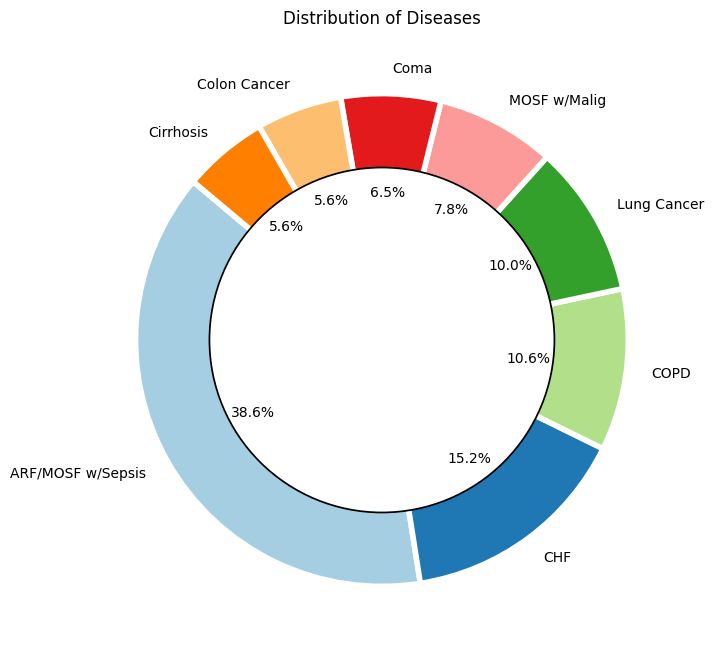

In [48]:

disease_counts = df['dzgroup'].value_counts()
colors = plt.cm.Paired(range(len(disease_counts)))
# Creating  a donut plot
plt.figure(figsize=(10, 8))
plt.pie(disease_counts, labels=disease_counts.index, autopct='%1.1f%%', startangle=140,
        colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 4})

# Adding a black circle at the centre to transform the pie chart into a donut chart
centre_circle = plt.Circle((0, 0), 0.70, color='black', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Diseases')
plt.show()


- #### "The donut graph represents the types of diseases and their percentages. At the highest, we have ARF/MOSF with Sepsis at 38.6%, and at the lowest, we have Cirrhosis and Colon Cancer, each at 5.6%."

- The distribution of diseases among hospital deaths provides valuable insights that can drive improvements in healthcare delivery, public health strategies, research, policy making, hospital management, and patient care. By focusing on the diseases with the highest mortality rates, stakeholders can work together to reduce hospital deaths and improve overall health outcomes.

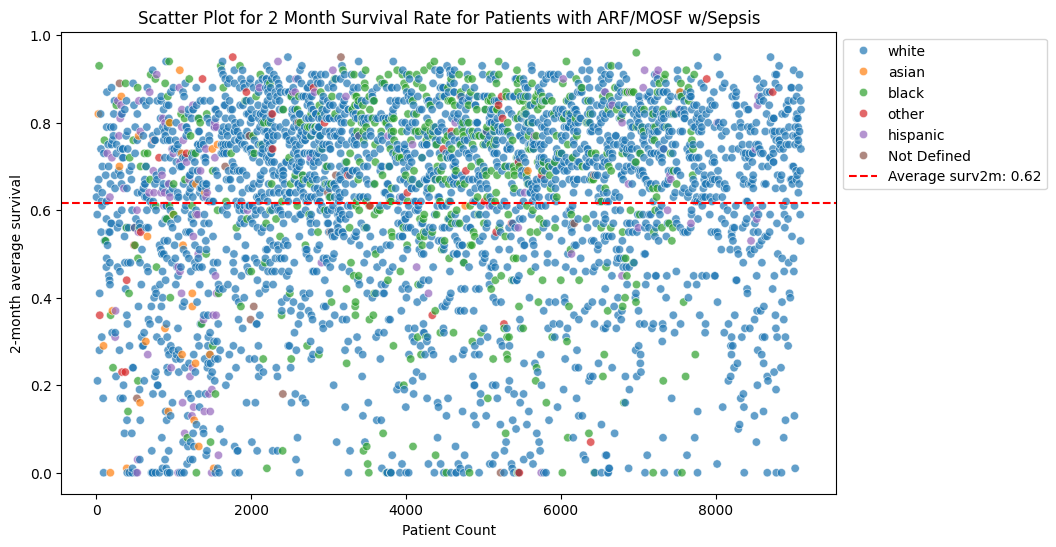

The average 2 month survival rate (surv2m) for patients with ARF/MOSF w/Sepsis is 0.62.


In [49]:
ARF_MOSF_w_Sepsis_patients = df[df['dzgroup'] == 'ARF/MOSF w/Sepsis']

# Calculating the average surv2m (2-month survival) rate for patients with Lung Cancer.
average_surv2m = ARF_MOSF_w_Sepsis_patients['surv2m'].mean()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ARF_MOSF_w_Sepsis_patients, x=ARF_MOSF_w_Sepsis_patients.index, y='surv2m', hue='race', alpha=0.7)
plt.axhline(y=average_surv2m, color='r', linestyle='--', label=f'Average surv2m: {average_surv2m:.2f}')
plt.xlabel('Patient Count')
plt.ylabel('2-month average survival')
plt.title('Scatter Plot for 2 Month Survival Rate for Patients with ARF/MOSF w/Sepsis')
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

print(f"The average 2 month survival rate (surv2m) for patients with ARF/MOSF w/Sepsis is {average_surv2m:.2f}.")

- #### The scatter plot provides a visual representation of the 2-month survival rates for patients with ARF/MOSF w/Sepsis 0.62%, highlighting the average survival rate with a red dashed line. Different colors represent different races, allowing for an analysis of survival rates across racial groups.

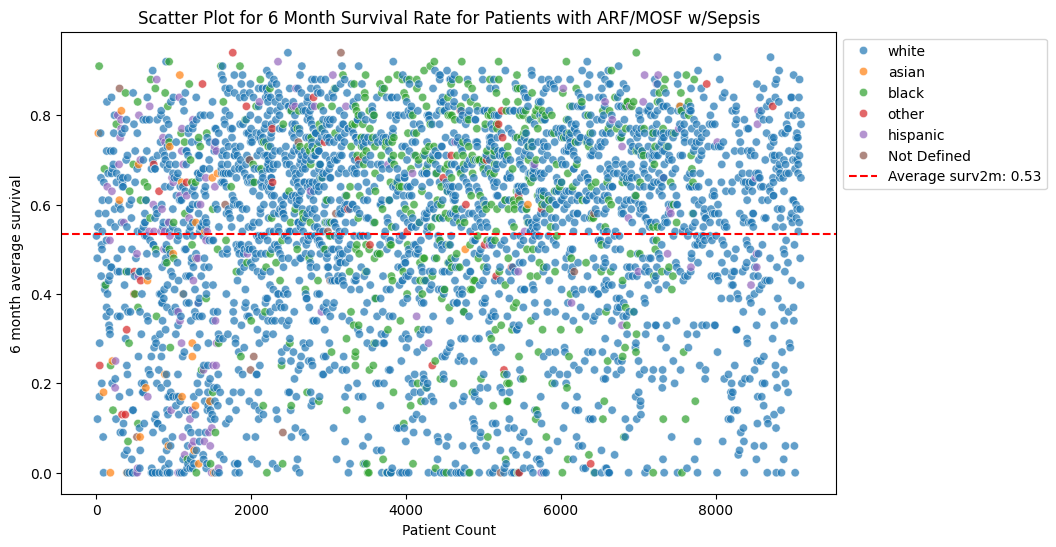

The average 6 month survival rate (surv6m) for patients with ARF/MOSF w/Sepsis is 0.53.


In [50]:
ARF_MOSF_w_Sepsis_patients = df[df['dzgroup'] == 'ARF/MOSF w/Sepsis']

# Calculate the average surv6m (6-month survival) rate for patients with Lung Cancer
average_surv6m = ARF_MOSF_w_Sepsis_patients['surv6m'].mean()

# Create a scatter plot of surv6m for patients with Lung Cancer with hue as race
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ARF_MOSF_w_Sepsis_patients, x=ARF_MOSF_w_Sepsis_patients.index, y='surv6m', hue='race', alpha=0.7)
plt.axhline(y=average_surv6m, color='r', linestyle='--', label=f'Average surv2m: {average_surv6m:.2f}')
plt.xlabel('Patient Count')
plt.ylabel('6 month average survival')
plt.title('Scatter Plot for 6 Month Survival Rate for Patients with ARF/MOSF w/Sepsis')
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

print(f"The average 6 month survival rate (surv6m) for patients with ARF/MOSF w/Sepsis is {average_surv6m:.2f}.")

- #### The scatter plot provides a visual representation of the 6-month survival rates for patients with ARF/MOSF w/Sepsis is 0.53 %, highlighting the average survival rate with a red dashed line. Different colors represent different races, allowing for an analysis of survival rates across racial groups.

# __Q2. What is the average heart rate of patients according to age group and diseases?__

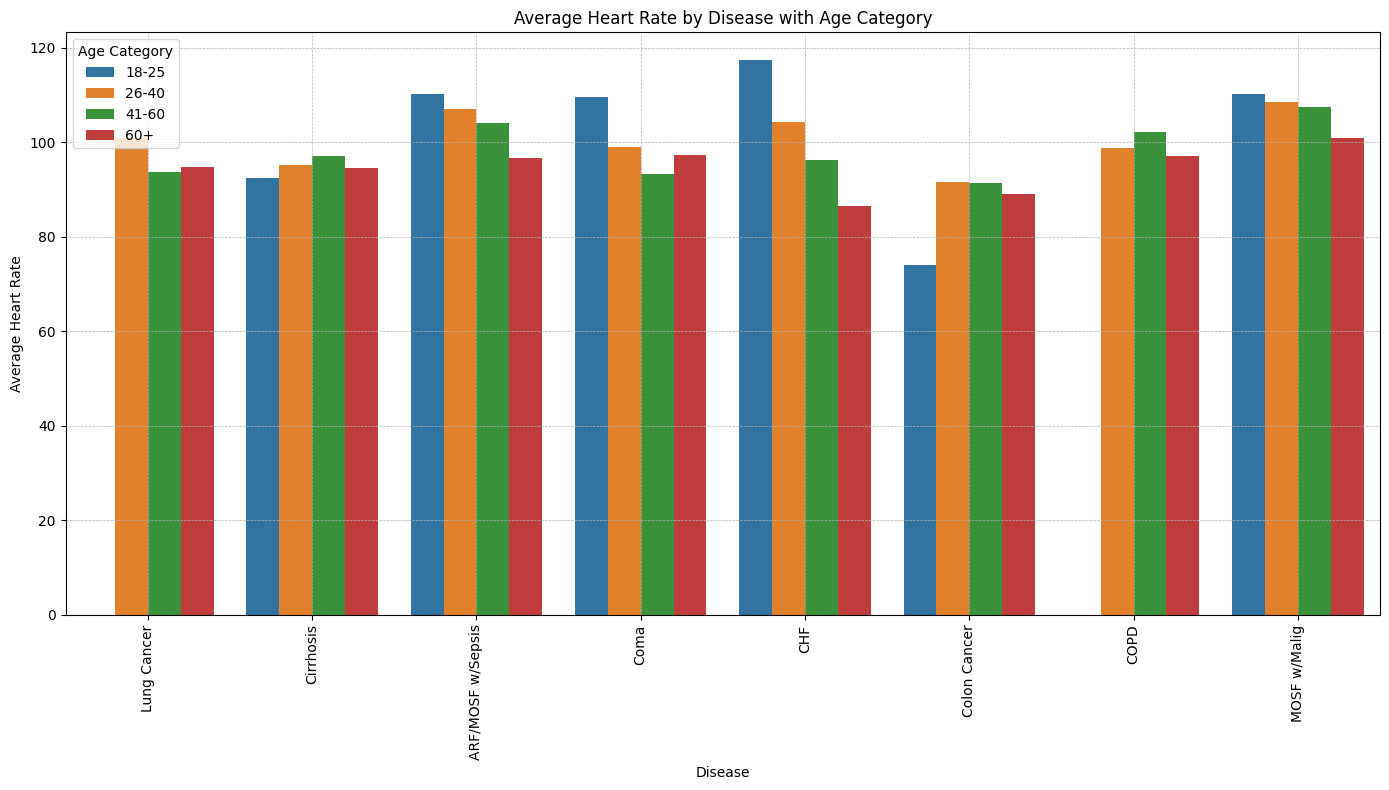

In [51]:
#Using Group by function to calculate average heart rate according to diseases
average_hrt_by_disease = df.groupby('dzgroup')['hrt'].mean()

# Finding the highest and lowest average heart rate
highest_hrt = average_hrt_by_disease.max()
lowest_hrt = average_hrt_by_disease.min()
highest_disease = average_hrt_by_disease.idxmax()
lowest_disease = average_hrt_by_disease.idxmin()

# Plotting data using age category
plt.figure(figsize=(14, 8))
sns.barplot(x='dzgroup', y='hrt', hue='age_category', data=df,errorbar=None)
plt.title('Average Heart Rate by Disease with Age Category')
plt.xlabel('Disease')
plt.ylabel('Average Heart Rate')



plt.legend(title='Age Category')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



- #### The bar plot effectively illustrates the average heart rates for various disease groups, with 'CHF' showing the highest average heart rate greater 100 hrt and 'Colon Cancer' the lowest less than 80 hrt. The use of different colors to represent age categories adds another layer of analysis, enabling a comparison of heart rates across different age groups.

# __Q3. What is the demography of patients having more than one diseases?__

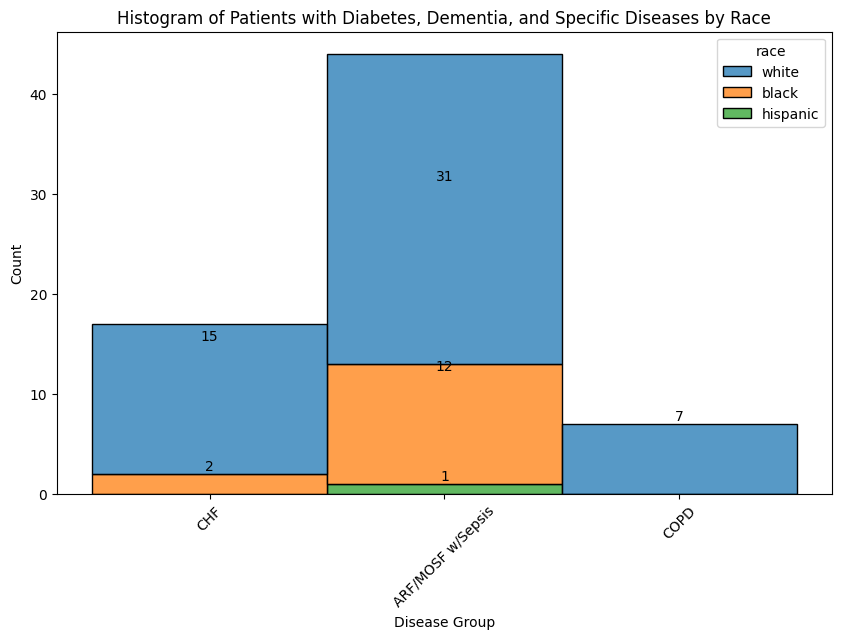

The total count of patients with diabetes, dementia, and specific diseases in dzgroup is: 68


In [52]:
# Filtering the dataset for patients with diabetes, dementia, and specific diseases in dzgroup
specific_diseases = ['Lung Cancer', 'Colon Cancer', 'CHF', 'COPD/CHF/Cirrhosis','ARF/MOSF w/Sepsis','COPD','MOSF w/Malig','Cirrhosis']
diabetes_dementia_dzgroup_patients = df[(df['diabetes'] == 1) & (df['dementia'] == 1) & (df['dzgroup'].isin(specific_diseases))]

# Counting the number of patients with diabetes, dementia, and specific diseases in dzgroup
count_diabetes_dementia_dzgroup_patients = len(diabetes_dementia_dzgroup_patients)
# Creating a histogram plot with hue as race
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(data=diabetes_dementia_dzgroup_patients, x='dzgroup', hue='race', multiple='stack')

# Adding count markers for better visualisation
for p in hist_plot.patches:
    height = p.get_height()
    if height > 0:
        hist_plot.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Histogram of Patients with Diabetes, Dementia, and Specific Diseases by Race')
plt.xlabel('Disease Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
print(f"The total count of patients with diabetes, dementia, and specific diseases in dzgroup is: {count_diabetes_dementia_dzgroup_patients}")

- #### The analysis of the intersection of diabetes, dementia, and specific diseases across different racial groups revealed that there are 68 patients who suffer from both diabetes and dementia and belong to specific disease groups.

# __Q4. What is the difference between prediction by Model and by Physician for 2 months & 6 Months survival rate for lung cancer?__

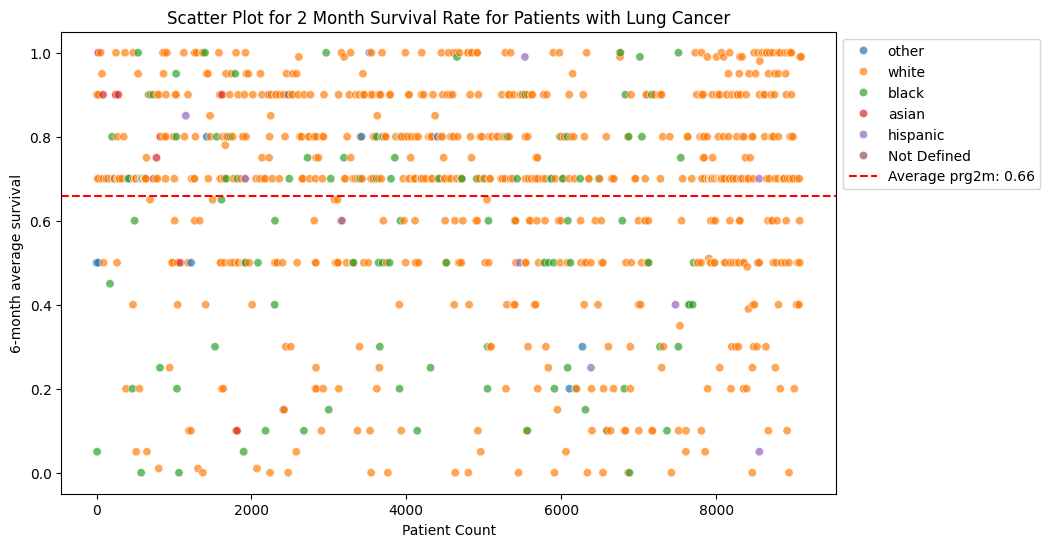

The average 2 month survival rate (prg2m) for patients with Lung Cancer is 0.66.


In [53]:
Lung_cancer_patients = df[df['dzgroup'] == 'Lung Cancer']

# Calculating the average surv2m (2-month survival) rate for patients with Lung Cancer
average_prg2m = Lung_cancer_patients['prg2m'].mean()

# Creating a scatter plot of surv2m for patients with Lung Cancer with hue as race
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Lung_cancer_patients, x=Lung_cancer_patients.index, y='prg2m', hue='race', alpha=0.7)
plt.axhline(y=average_prg2m, color='r', linestyle='--', label=f'Average prg2m: {average_prg2m:.2f}')
plt.xlabel('Patient Count')
plt.ylabel('6-month average survival')
plt.title('Scatter Plot for 2 Month Survival Rate for Patients with Lung Cancer')
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

print(f"The average 2 month survival rate (prg2m) for patients with Lung Cancer is {average_prg2m:.2f}.")

- #### The analysis of the 2-month survival rate (prg2m) for patients with Lung Cancer revealed that the average survival rate is 0.66 percent. This average serves as a benchmark for comparing individual patient outcomes. The scatter plot visualized the survival rates for each patient, with different colors representing various races, highlighting the distribution of survival rates by race and potential disparities.

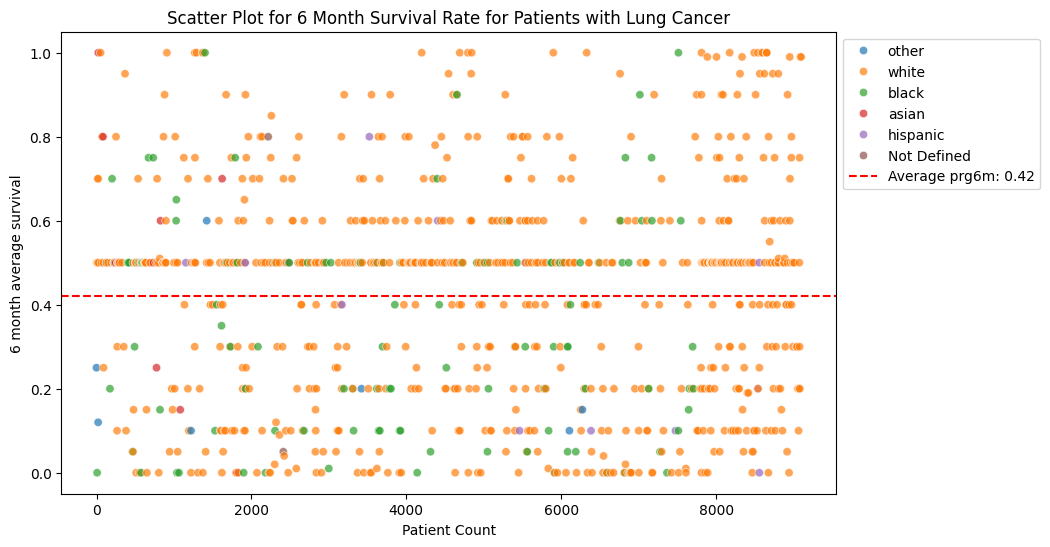

The average 6 month survival rate (prg6m) for patients with Lung Cancer is 0.42.


In [54]:
Lung_cancer_patients = df[df['dzgroup'] == 'Lung Cancer']

# Calculating the average surv6m (6 month survival) rate for patients with Lung Cancer
average_prg6m = Lung_cancer_patients['prg6m'].mean()

# Creating a scatter plot of surv6m for patients with Lung Cancer with hue as race
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Lung_cancer_patients, x=Lung_cancer_patients.index, y='prg6m', hue='race', alpha=0.7)
plt.axhline(y=average_prg6m, color='r', linestyle='--', label=f'Average prg6m: {average_prg6m:.2f}')
plt.xlabel('Patient Count')
plt.ylabel('6 month average survival')
plt.title('Scatter Plot for 6 Month Survival Rate for Patients with Lung Cancer')
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

print(f"The average 6 month survival rate (prg6m) for patients with Lung Cancer is {average_prg6m:.2f}.")

- #### The analysis of the 6-month survival rate (prg6m) for patients with Lung Cancer revealed that the average survival rate is 0.42 percent. This average serves as a benchmark for comparing individual patient outcomes. The scatter plot visualized the survival rates for each patient, with different colors representing various races, highlighting the distribution of survival rates by race and potential disparities.

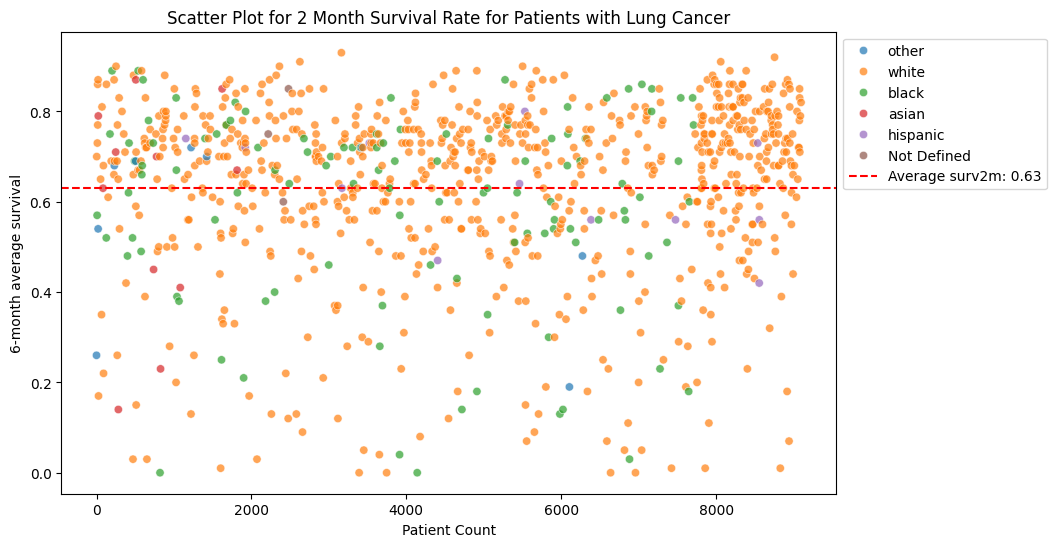

The average 2 month survival rate (surv2m) for patients with Lung Cancer is 0.63.


In [55]:
Lung_cancer_patients = df[df['dzgroup'] == 'Lung Cancer']

# Calculate the average surv2m (2-month survival) rate for patients with Lung Cancer
average_surv2m = Lung_cancer_patients['surv2m'].mean()

# Create a scatter plot of surv2m for patients with Lung Cancer with hue as race
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Lung_cancer_patients, x=Lung_cancer_patients.index, y='surv2m', hue='race', alpha=0.7)
plt.axhline(y=average_surv2m, color='r', linestyle='--', label=f'Average surv2m: {average_surv2m:.2f}')
plt.xlabel('Patient Count')
plt.ylabel('6-month average survival')
plt.title('Scatter Plot for 2 Month Survival Rate for Patients with Lung Cancer')
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

print(f"The average 2 month survival rate (surv2m) for patients with Lung Cancer is {average_surv2m:.2f}.")

- #### The analysis of the 2-month survival rate (surv2m) for patients with Lung Cancer revealed that the average survival rate is 0.63 percent. This average serves as a benchmark for comparing individual patient outcomes. The scatter plot visualized the survival rates for each patient, with different colors representing various races, highlighting the distribution of survival rates by race and potential disparities.

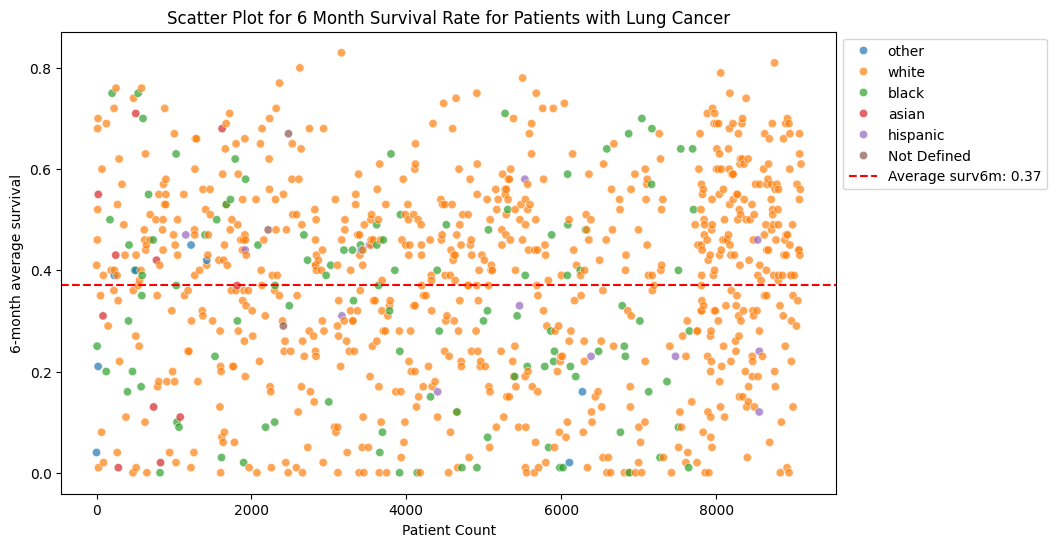

The average 6 month survival rate (surv6m) for patients with Lung Cancer is 0.37.


In [56]:
Lung_cancer_patients = df[df['dzgroup'] == 'Lung Cancer']

# Calculating the average surv6m (6 month survival) rate for patients with Lung Cancer
average_surv6m = Lung_cancer_patients['surv6m'].mean()

# Creating a scatter plot of surv6m for patients with Lung Cancer with hue as race
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Lung_cancer_patients, x=Lung_cancer_patients.index, y='surv6m', hue='race', alpha=0.7)
plt.axhline(y=average_surv6m, color='r', linestyle='--', label=f'Average surv6m: {average_surv6m:.2f}')
plt.xlabel('Patient Count')
plt.ylabel('6-month average survival')
plt.title('Scatter Plot for 6 Month Survival Rate for Patients with Lung Cancer')
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

print(f"The average 6 month survival rate (surv6m) for patients with Lung Cancer is {average_surv6m:.2f}.")

- #### The analysis of the 6-month survival rate (surv6m) for patients with Lung Cancer revealed that the average survival rate is 0.37 percent. This average serves as a benchmark for comparing individual patient outcomes. The scatter plot visualized the survival rates for each patient, with different colors representing various races, highlighting the distribution of survival rates by race and potential disparities.

 # __Q5. What is the average Wblc ( White blood cell count) of patients according to diseases?__

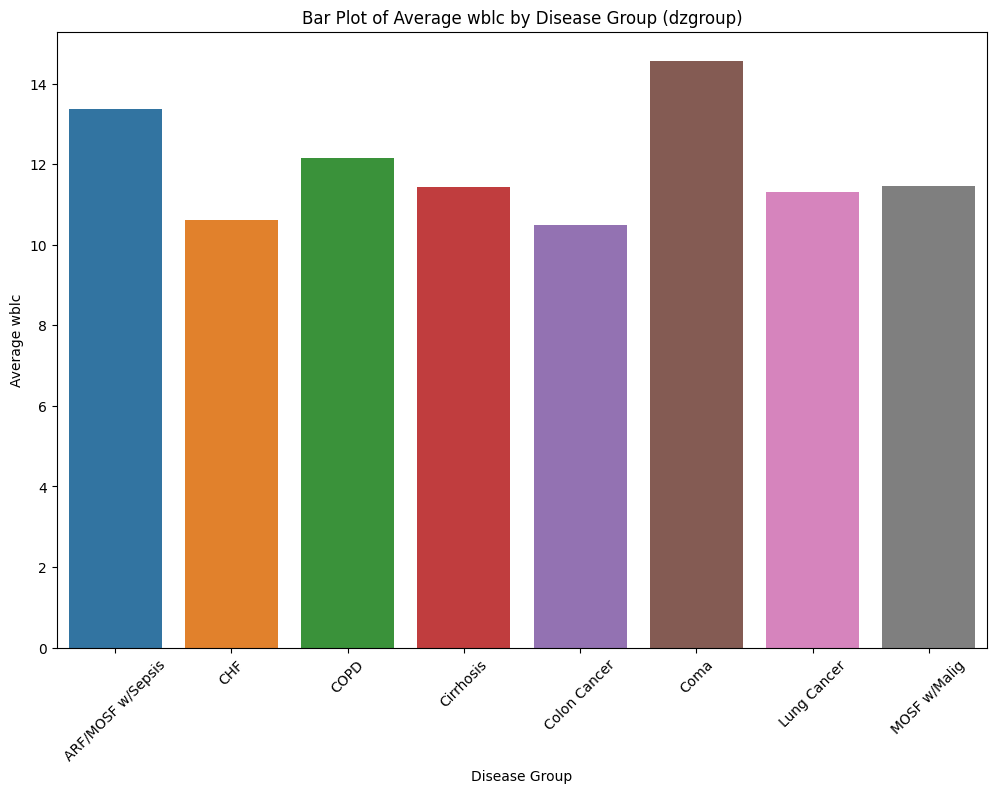

Highest average wblc: Coma with 14.56
Lowest average wblc: Colon Cancer with 10.49


In [57]:
# Calculating the average wblc for each disease group (dzgroup)
average_wblc_by_dzgroup = df.groupby('dzgroup')['wblc'].mean().reset_index()
average_wblc_by_dzgroup['wblc'] = average_wblc_by_dzgroup['wblc'].round(2)
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=average_wblc_by_dzgroup, x='dzgroup', y='wblc',hue='dzgroup')
plt.title('Bar Plot of Average wblc by Disease Group (dzgroup)')
plt.xlabel('Disease Group')
plt.ylabel('Average wblc')
plt.xticks(rotation=45)
plt.show()
highest = average_wblc_by_dzgroup.loc[average_wblc_by_dzgroup['wblc'].idxmax()]
lowest = average_wblc_by_dzgroup.loc[average_wblc_by_dzgroup['wblc'].idxmin()]
print(f"Highest average wblc: {highest['dzgroup']} with {highest['wblc']}")
print(f"Lowest average wblc: {lowest['dzgroup']} with {lowest['wblc']}")

- #### The analysis of the average white blood cell count (wblc) across different disease groups (dzgroup) revealed significant variations. The highest average wblc was observed in patients with Coma, with an average count of 14.56. This elevated wblc could indicate a heightened immune response or infection, which is often associated with severe medical conditions like Coma. On the other hand, the lowest average wblc was found in patients with Colon Cancer, with an average count of 10.49.

# __Q6. What is the average age group of patients suffering from diseases?__
###  A. _What is the average age of patients having diabetes?_

The age group most affected by health issues is: 60+


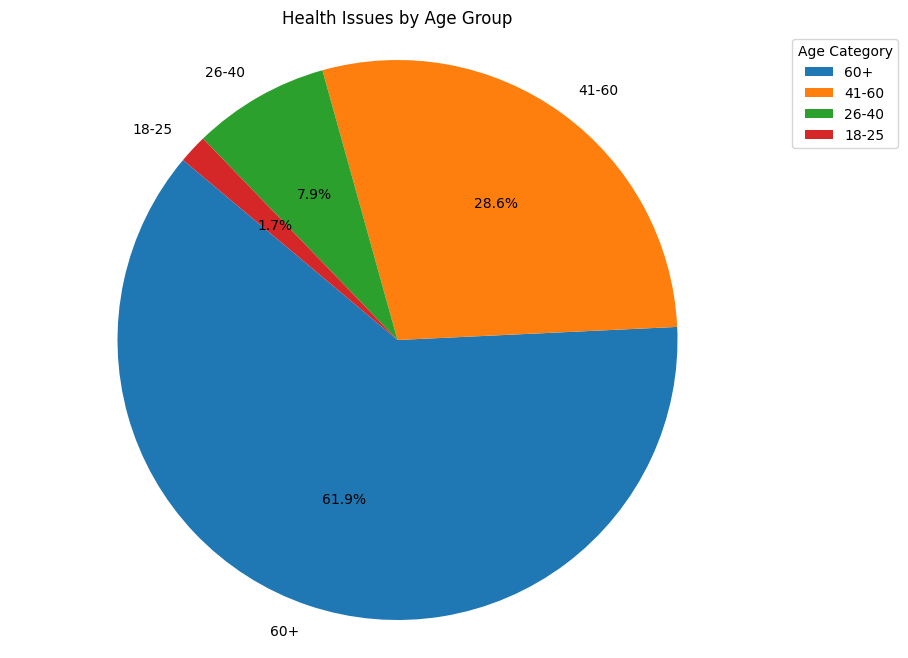

In [58]:
# Grouping the data by age category and count the number of health issues
health_issues_by_age_group = df['age_category'].value_counts()

# Determining the age group most affected by health issues
most_affected_age_group = health_issues_by_age_group.idxmax()

print(f"The age group most affected by health issues is: {most_affected_age_group}")

# Creating a pie plot for health issues by age group
plt.figure(figsize=(10, 8))
plt.pie(health_issues_by_age_group, labels=health_issues_by_age_group.index, autopct='%1.1f%%', startangle=140)
plt.title('Health Issues by Age Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title="Age Category", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

- #### The analysis of health issues by age group revealed significant disparities across different age categories. The age group most affected by health issues is the 60+ category, which accounts for 61.9% of the total health issues. This high percentage indicates that older adults are more prone to health problems, likely due to age-related conditions and chronic diseases. On the other hand, the age group least affected by health issues is the 18-25 category, comprising only 1.7% of the total. This lower percentage suggests that younger adults generally experience fewer health problems, possibly due to better overall health and fewer chronic conditions. The pie chart visualization effectively highlights these differences, providing a clear comparison of health issues across various age groups.

In [59]:
# Filtering the DataFrame to include only rows where diabetes is indicated
diabetes_df = df[df['diabetes'] == 1]

# Calculating the average age of people suffering from diabetes
average_age_diabetes = diabetes_df['age'].mean()

print(f"The average age of people suffering from diabetes is {average_age_diabetes:.2f} years.")

The average age of people suffering from diabetes is 65.69 years.


- #### The analysis of the dataset revealed that the average age of individuals suffering from diabetes is 65.69 years. This finding indicates that diabetes predominantly affects older adults, which aligns with the understanding that the risk of developing diabetes increases with age.

# __Q7. What is the average length of stay(slos) according to diseases?__
### _A. What is the average length of stay(slos) according to gender?_

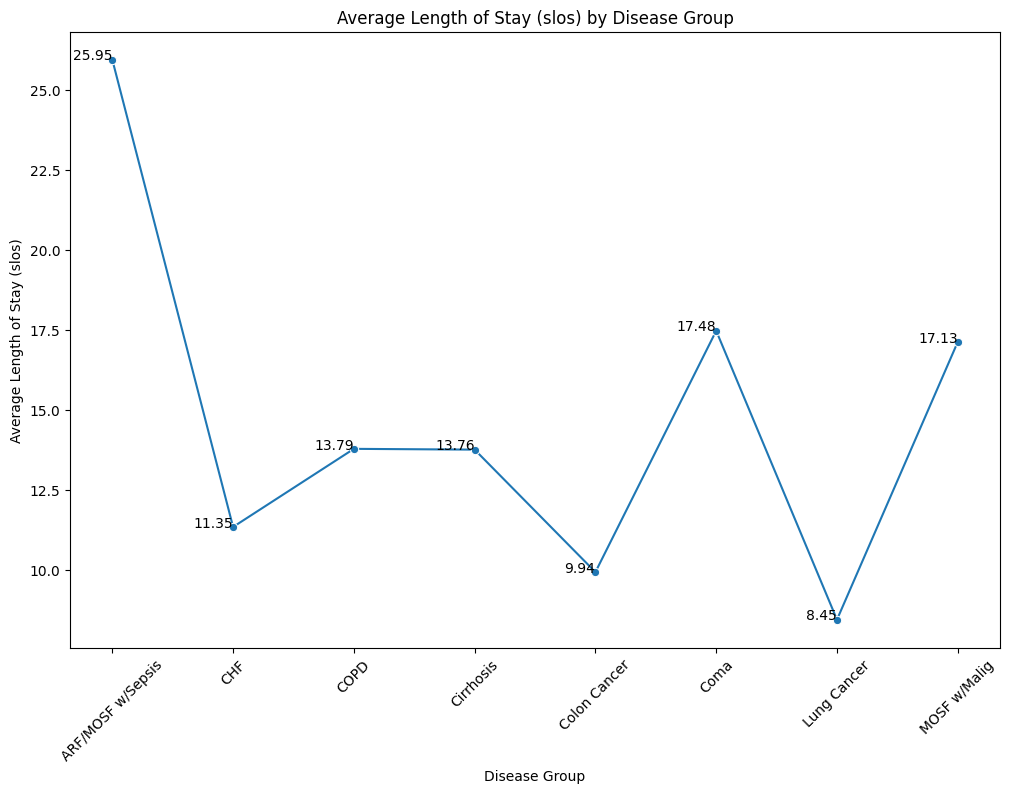

In [60]:
average_slos_by_dzgroup = df.groupby('dzgroup')['slos'].mean().reset_index()

# Creating a line plot for average length of stay by disease group
plt.figure(figsize=(12, 8))
sns.lineplot(data=average_slos_by_dzgroup, x='dzgroup', y='slos', marker='o')

# Adding annotations for each point
for i in range(len(average_slos_by_dzgroup)):
    plt.text(average_slos_by_dzgroup['dzgroup'][i],
             average_slos_by_dzgroup['slos'][i],
             round(average_slos_by_dzgroup['slos'][i], 2),
             horizontalalignment='right')

plt.title('Average Length of Stay (slos) by Disease Group')
plt.xlabel('Disease Group')
plt.ylabel('Average Length of Stay (slos)')
plt.xticks(rotation=45)
plt.show()

- #### The analysis of the average length of stay (slos) by disease group reveals significant differences. Notably, patients with ARF/MOSF w/Sepsis have the highest average length of stay at 22.95 days, indicating a more prolonged hospitalization period. In contrast, patients with lung cancer have the shortest average length of stay at 8.45 days.

In [61]:
# Calculating the average length of stay (slos) in the hospital for patients according to gender
average_slos_by_gender = df.groupby('sex')['slos'].mean().reset_index()

print("The average length of stay (slos) in the hospital for patients according to gender:")
print(average_slos_by_gender)

The average length of stay (slos) in the hospital for patients according to gender:
      sex       slos
0  female  18.315075
1    male  17.512000


- #### The analysis of the average length of stay (slos) in the hospital according to gender reveals that female patients have a slightly longer average stay of 18.32 days compared to male patients, who have an average stay of 17.51 days.

## __Q8. How does the average TISS score (avtisst) from days 3-25 correlate with the total costs (totcst) incurred in the ICU and IMCU for patients with different disease groups (dzgroup)?__

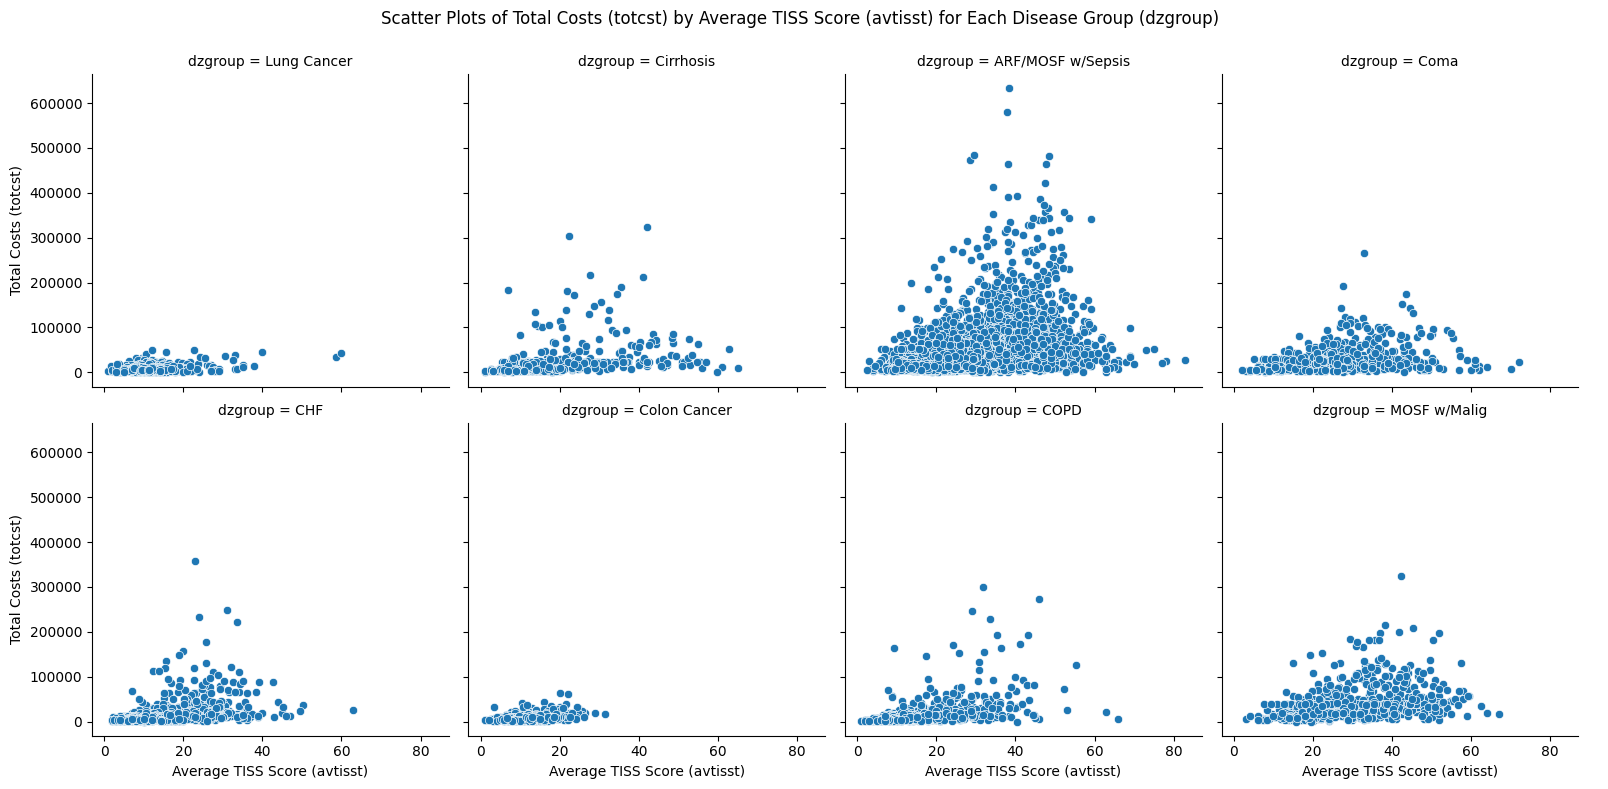

In [62]:
# Creating a Facegrid plot for visualisation according to diseases and totalcost
g = sns.FacetGrid(df, col='dzgroup', col_wrap=4, height=4)
g.map(sns.scatterplot, 'avtisst', 'totcst')
g.add_legend()
g.set_axis_labels('Average TISS Score (avtisst)', 'Total Costs (totcst)')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Plots of Total Costs (totcst) by Average TISS Score (avtisst) for Each Disease Group (dzgroup)')
plt.show()

- #### The FacetGrid plot provides a detailed visualization of the relationship between the Average TISS Score (avtisst) and Total Costs (totcst) across different disease groups (dzgroup). Each scatter plot within the grid represents a specific disease group, allowing for a comparative analysis. The plots reveal how total costs vary with changes in the average TISS score for each disease group.

## __Q9. What is the impact of the timing of a Do Not Resuscitate (DNR) order (dnrday) on the length of hospital stay (hday) for patients with different DNR statuses (dnr) across various disease groups (dzgroup)?__

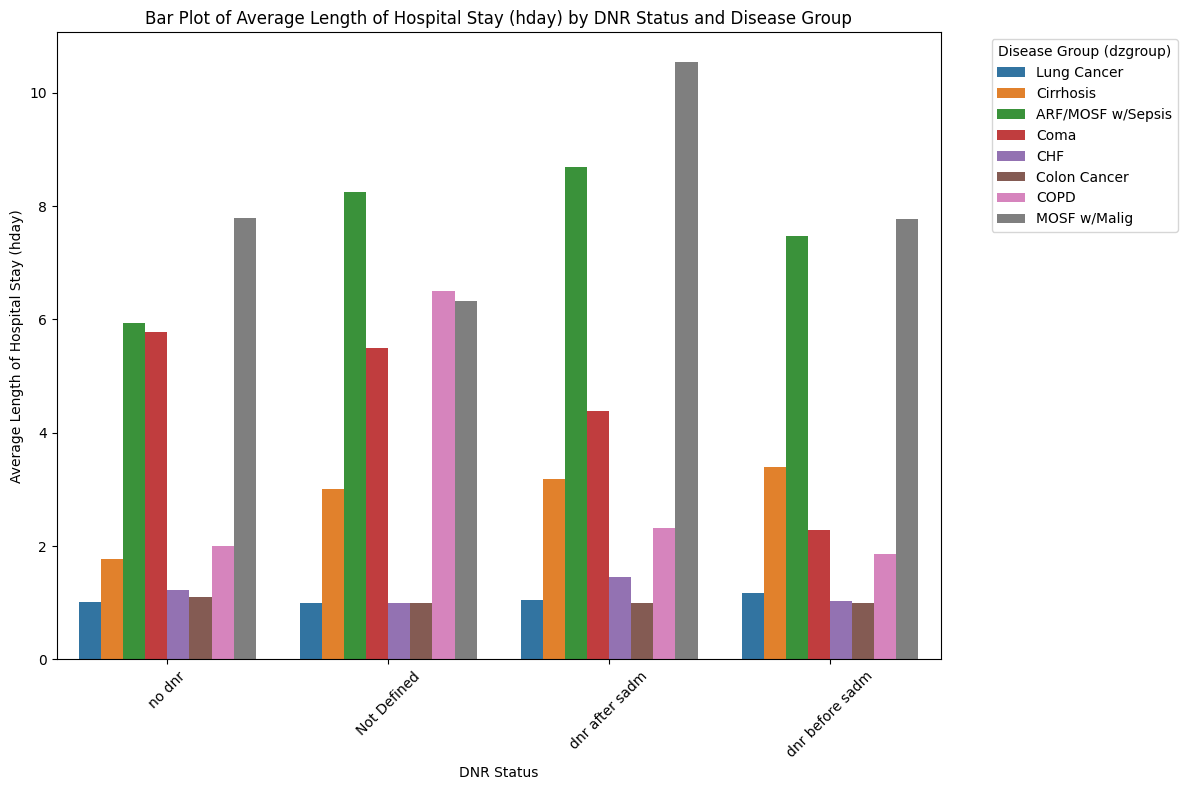

In [63]:
plt.figure(figsize=(12, 8))
sns.barplot(x='dnr', y='hday', hue='dzgroup', data=df, errorbar=None)
plt.title('Bar Plot of Average Length of Hospital Stay (hday) by DNR Status and Disease Group')
plt.xlabel('DNR Status')
plt.ylabel('Average Length of Hospital Stay (hday)')
plt.legend(title='Disease Group (dzgroup)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

- #### The bar plot reveals that patients with a DNR status after admission (sadm) have an average hospital stay of more than 10 days. In contrast, patients with no DNR status and those with a DNR status before admission have similar average hospital stays, both being less than 8 days. This indicates that the timing of the DNR decision significantly impacts the length of hospital stay, with post-admission DNR decisions associated with longer stays.

## __Q10. How do blood pH levels (ph) vary across different disease groups (dzgroup), and what are the implications of these variations for clinical decision-making and patient management?__

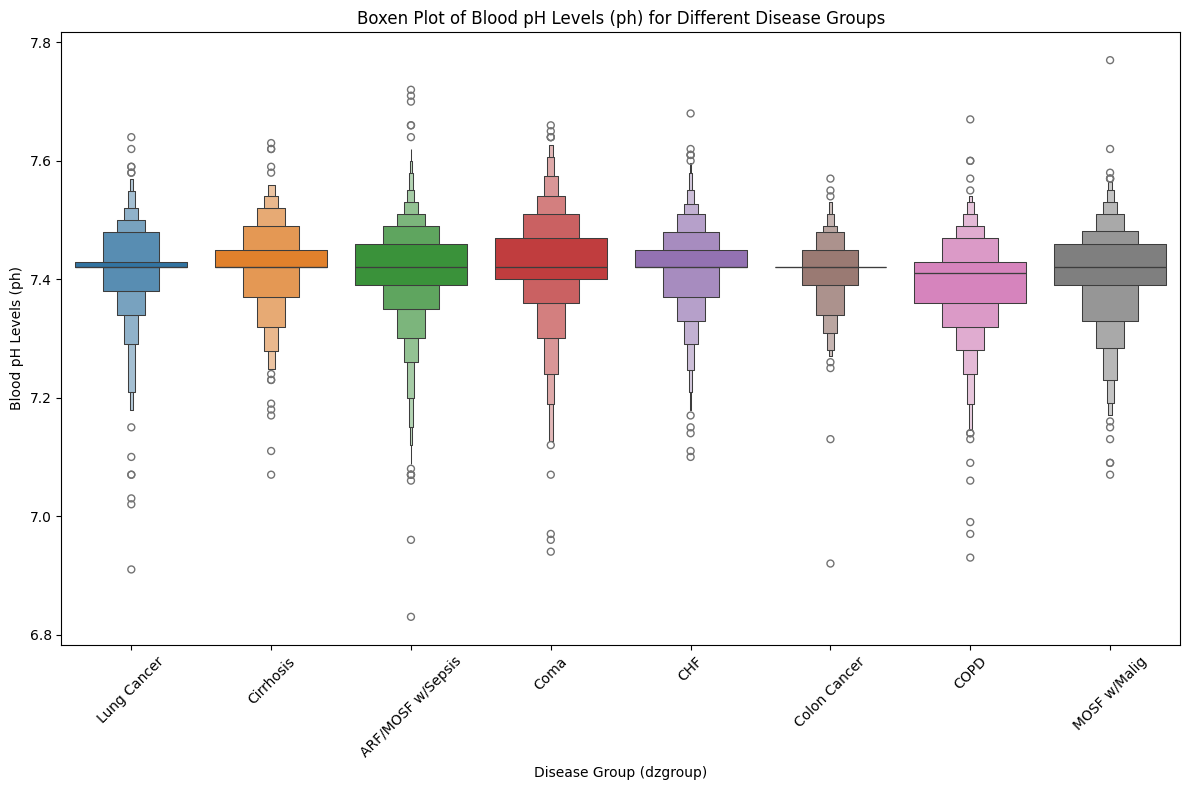

In [64]:
# Convert relevant columns to numeric values, coerce errors to NaN
df['ph'] = pd.to_numeric(df['ph'], errors='coerce')
df['resp'] = pd.to_numeric(df['resp'], errors='coerce')
df['hrt'] = pd.to_numeric(df['hrt'], errors='coerce')
df['surv6m'] = pd.to_numeric(df['surv6m'], errors='coerce')
plt.figure(figsize=(12, 8))
sns.boxenplot(x='dzgroup', y='ph', hue='dzgroup', data=df)
plt.title('Boxen Plot of Blood pH Levels (ph) for Different Disease Groups')
plt.xlabel('Disease Group (dzgroup)')
plt.ylabel('Blood pH Levels (ph)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- #### The boxen plot of blood pH levels (ph) for different disease groups indeed shows the presence of outliers. These outliers represent individual data points that deviate significantly from the rest of the data, indicating unusual or extreme values in blood pH levels within certain disease groups

# __Q11. Which diseases have most hospital dead and which age group has affected the most?__

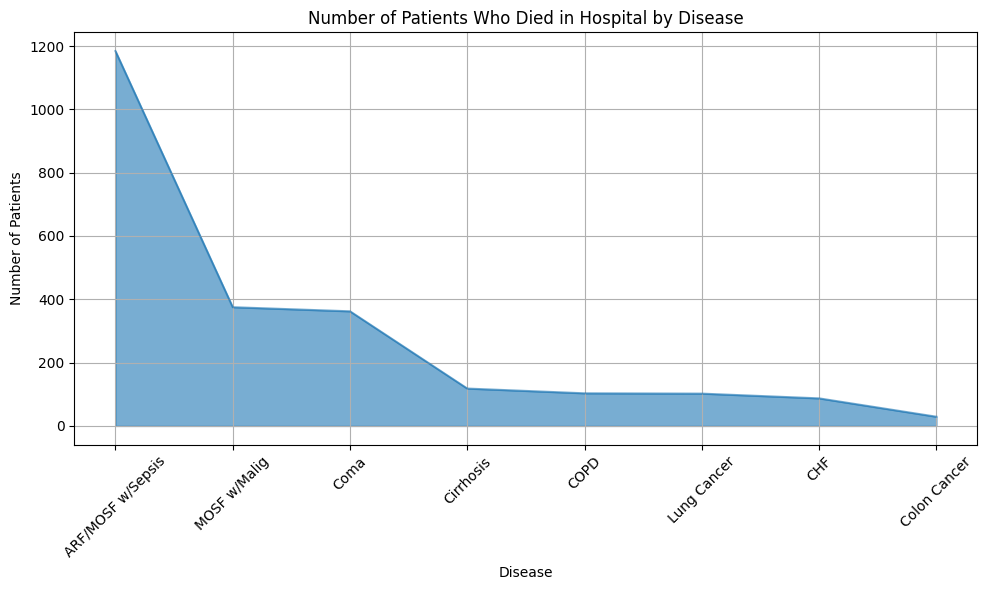

dzgroup
ARF/MOSF w/Sepsis    1184
MOSF w/Malig          375
Coma                  362
Cirrhosis             118
COPD                  103
Lung Cancer           102
CHF                    87
Colon Cancer           29
Name: count, dtype: int64


In [65]:

# Filter the patients who are 'hospdead'
hospdead_patients = df[df['hospdead'] == 1]

# Count the number of patients who died from each disease
disease_counts = hospdead_patients['dzgroup'].value_counts()

# Create a stacked area chart
plt.figure(figsize=(10, 6))
disease_counts.plot(kind='area', stacked=True, alpha=0.6)
plt.title('Number of Patients Who Died in Hospital by Disease')
plt.xlabel('Disease')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


# Show the plot
plt.show()

# Print the counts for verification
print(disease_counts)

- #### The analysis of hospital deaths by disease reveals that ARF/MOSF w/Sepsis is the leading cause, with 1,184 patients succumbing to this condition. This is followed by MOSF w/Malig, which accounts for 375 deaths, and Coma, with 362 deaths. Other significant contributors include Cirrhosis (118 deaths), COPD (103 deaths), and Lung Cancer (102 deaths). CHF and Colon Cancer have relatively lower death counts, with 87 and 29 deaths, respectively.

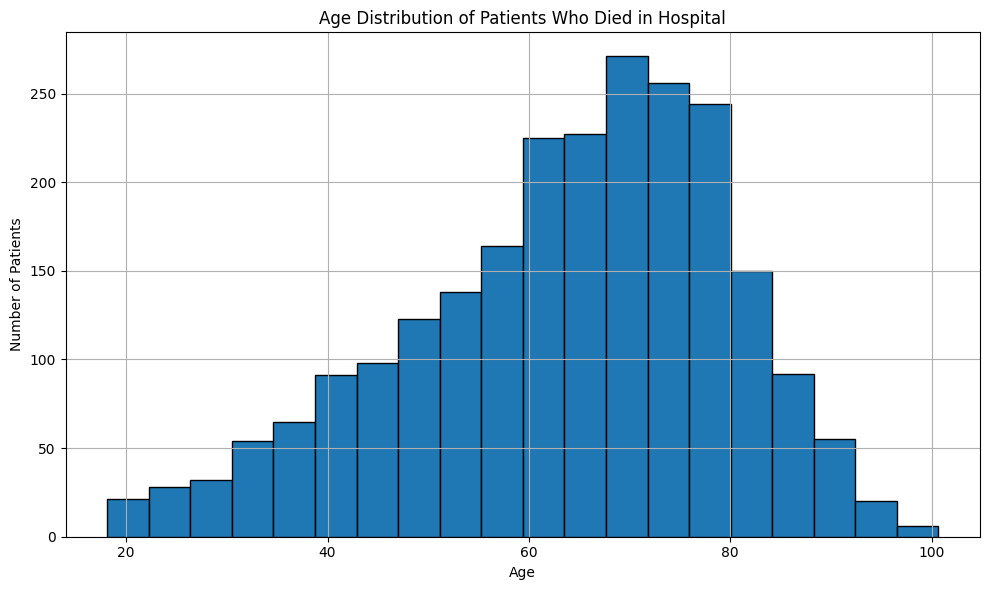

In [66]:
# Filtering the patients who are 'hospdead'
hospdead_patients = df[df['hospdead'] == 1]

# Analyze the age distribution of these patients
age_distribution = hospdead_patients['age']
plt.figure(figsize=(10, 6))
plt.hist(age_distribution, bins=20, edgecolor='black')
plt.title('Age Distribution of Patients Who Died in Hospital')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


- #### The histogram of the age distribution for patients who died in the hospital reveals that the majority of deaths occurred in the age group between 60 and 80 years. This indicates that older adults are more vulnerable and have a higher mortality rate in hospital settings.

## __Q12. How do disease severity scores (APS and SPS) vary across different disease groups?__


/tmp/ipython-input-2941936776.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='dzgroup', y='aps', data=df, scale='width', inner='quartile')


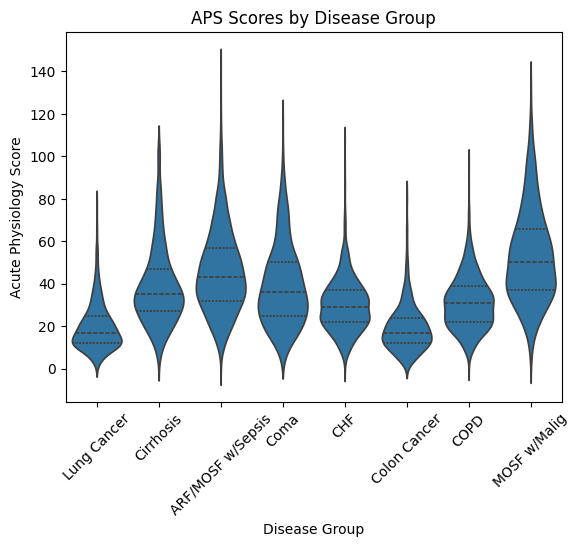

/tmp/ipython-input-2941936776.py:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='dzgroup', y='sps', data=df, scale='width', inner='quartile')


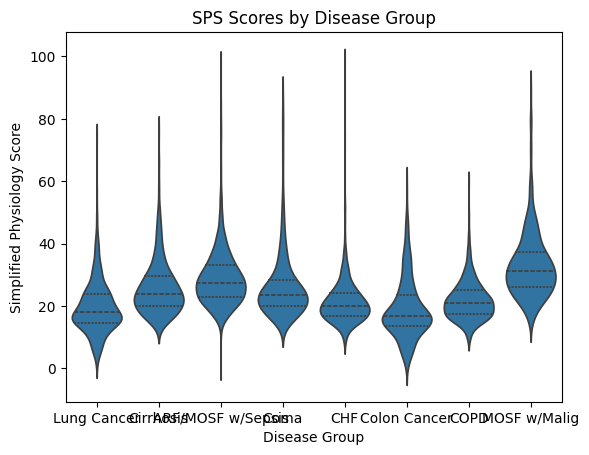

In [67]:
#Plot 1: Violin Plot of APS Scores by Disease Group
sns.violinplot(x='dzgroup', y='aps', data=df, scale='width', inner='quartile')
plt.title("APS Scores by Disease Group")
plt.xlabel("Disease Group")
plt.ylabel("Acute Physiology Score")
plt.xticks(rotation=45)
plt.show()

# Plot 2: Violin Plot of SPS Scores by Disease Group
sns.violinplot(x='dzgroup', y='sps', data=df, scale='width', inner='quartile')
plt.title("SPS Scores by Disease Group")
plt.xlabel("Disease Group")
plt.ylabel("Simplified Physiology Score")# Convert non-numeric values in 'sfdm2' to NaN
df['sfdm2'] = pd.to_numeric(df['sfdm2'], errors='coerce')



- #### The analysis of the Acute Physiology Score (APS) and Simplified Physiology Score (SPS) across different disease groups reveals significant variations in physiological stress levels. ARF/MOSF w/Sepsis stands out with APS scores exceeding 140, indicating severe physiological stress, while colon cancer and lung cancer have the lowest APS scores, ranging between 80 and 100. In terms of SPS, ARF/MOSF w/Sepsis and CHF show similar scores around 100, reflecting high stress levels, whereas COPD has SPS scores under 60, indicating comparatively lower stress.

## __Q13. How does the number of comorbidities influence the severity of disease in patients?__

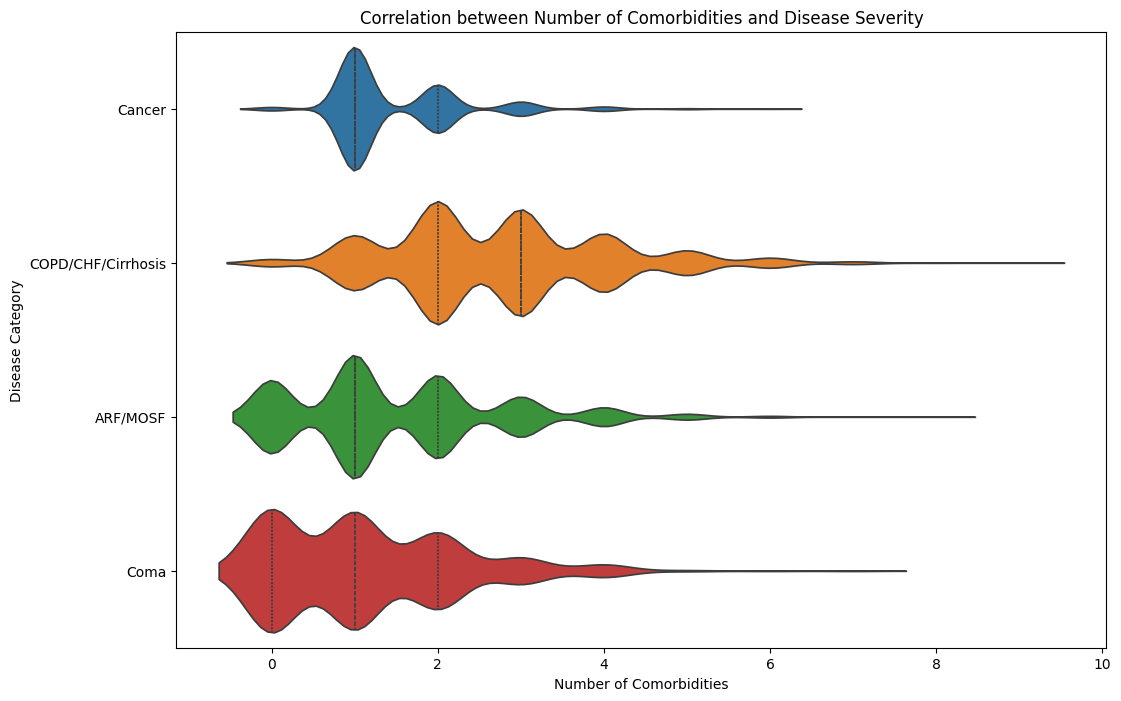

In [68]:
# Correlation between Number of Comorbidities (num.co) and Disease Severity
plt.figure(figsize=(12, 8))
sns.violinplot(x='num.co', y='dzclass', data=df, hue='dzclass', inner='quartile')
plt.title('Correlation between Number of Comorbidities and Disease Severity')
plt.xlabel('Number of Comorbidities')
plt.ylabel('Disease Category')
plt.show()

- #### The violin plot illustrates the correlation between the number of comorbidities (num.co) and disease severity (dzclass). The distribution of comorbidities across different disease categories shows that as the number of comorbidities increases, the severity of the disease also tends to increase. This suggests that patients with multiple comorbidities are more likely to experience severe disease conditions.

## __Q14.What is the income of patients according to diseases?__

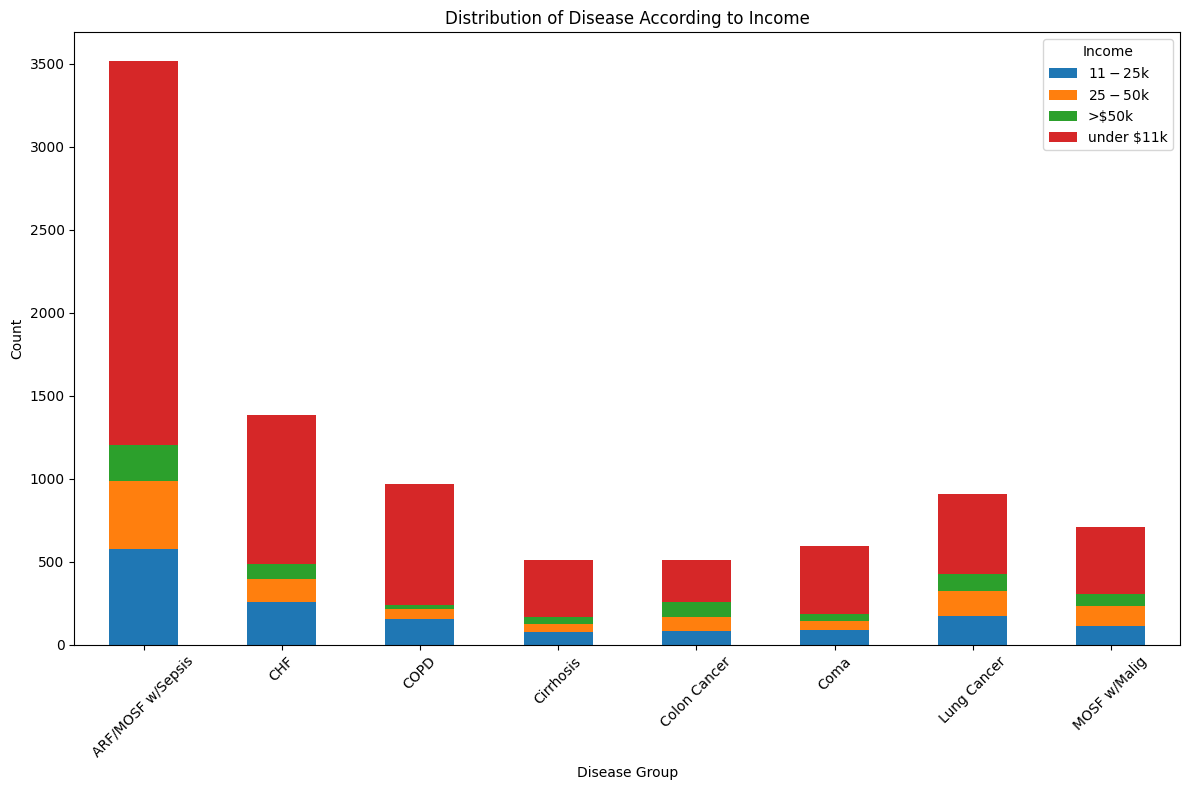

In [69]:
# Using Group by 'dzgroup' and 'income' and count the occurrences
disease_income_distribution = df.groupby(['dzgroup', 'income']).size().unstack()

# Plotting the bar plot
disease_income_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Disease According to Income')
plt.xlabel('Disease Group')
plt.ylabel('Count')
plt.legend(title='Income')
plt.xticks(rotation=45)
plt.tight_layout()


- __The bar plot illustrating the distribution of diseases according to income reveals significant insights. It shows how different disease groups are distributed across various income levels, highlighting which diseases are more prevalent in certain income brackets.__

## __Q15. How does the prevalence of diabetes vary across disease groups?__

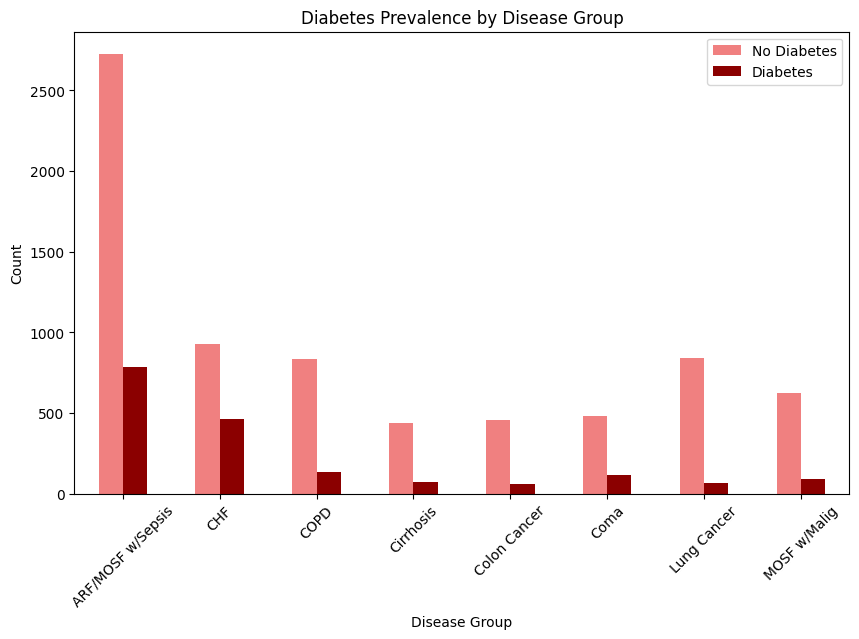

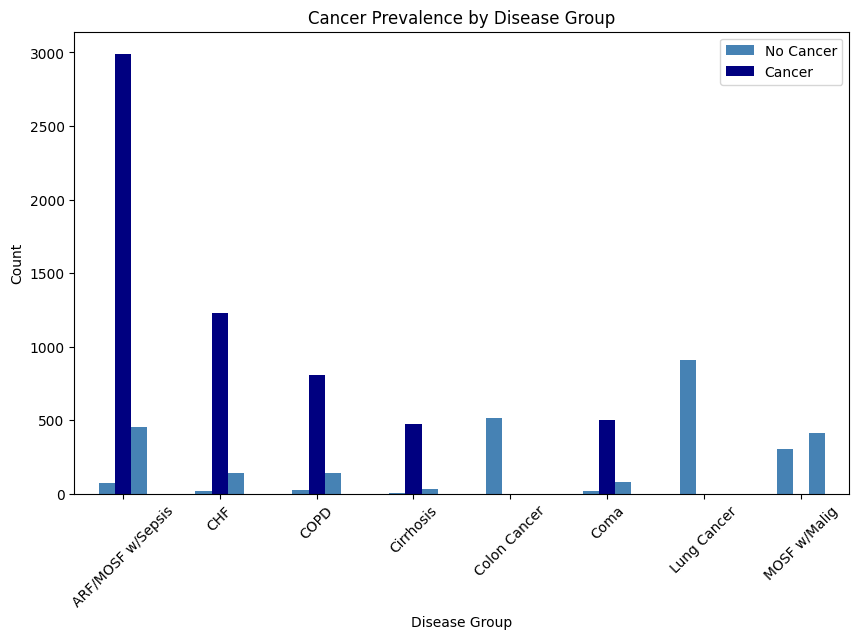

In [70]:
# Grouped bar chart for diabetes prevalence
diabetes_group = df.groupby(['dzgroup', 'diabetes']).size().unstack()
diabetes_group.plot(kind='bar', figsize=(10, 6), color=['lightcoral', 'darkred'])
plt.title("Diabetes Prevalence by Disease Group")
plt.xlabel("Disease Group")
plt.ylabel("Count")
plt.legend(["No Diabetes", "Diabetes"])
plt.xticks(rotation=45)
plt.show()


# Grouped bar chart for cancer prevalence
cancer_group = df.groupby(['dzgroup', 'ca']).size().unstack()
cancer_group.plot(kind='bar', figsize=(10, 6), color=['steelblue', 'navy'])
plt.title("Cancer Prevalence by Disease Group")
plt.xlabel("Disease Group")
plt.ylabel("Count")
plt.legend(["No Cancer", "Cancer"])
plt.xticks(rotation=45)
plt.show()

- __The grouped bar charts for diabetes and cancer prevalence by disease group provide valuable insights into the distribution of these conditions across different disease groups. For diabetes prevalence, the chart shows the count of individuals with and without diabetes within each disease group, helping to identify which groups have a higher prevalence of diabetes and indicating potential comorbidities or risk factors. Similarly, the cancer prevalence chart illustrates the distribution of individuals with and without cancer across various disease groups, highlighting those more likely to have cancer patients and suggesting possible links between certain diseases and cancer__

## __Q16. How does the average survival probability differ between early and late time groups across various age categories, and what trends can be observed over time?__

/tmp/ipython-input-2444676113.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_age = df.groupby(['age_category', 'time_group'])['surv6m'].mean().unstack()


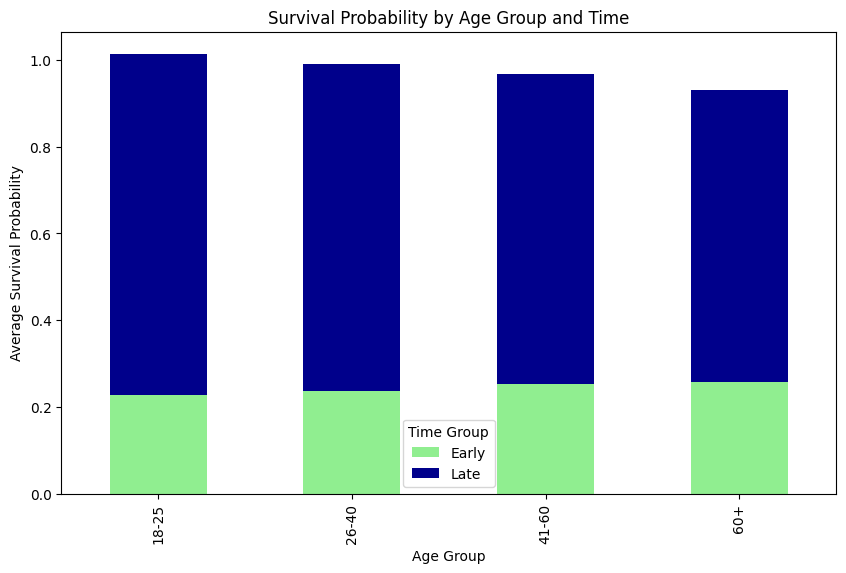

/tmp/ipython-input-2444676113.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_survival = df.groupby(['time_group', 'age_category'])['surv6m'].mean().unstack()


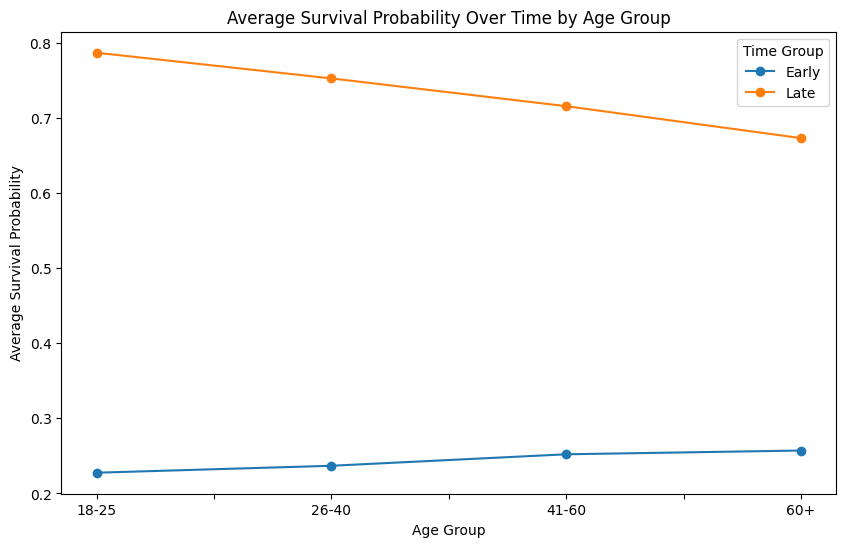

In [71]:
df['time_group'] = ['Early' if prob < 0.5 else 'Late' for prob in df['surv6m']]
# Stacked bar chart for survival probabilities by age category
survival_age = df.groupby(['age_category', 'time_group'])['surv6m'].mean().unstack()
survival_age.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightgreen', 'darkblue'])
plt.title("Survival Probability by Age Group and Time")
plt.xlabel("Age Group")
plt.ylabel("Average Survival Probability")
plt.legend(title="Time Group")
plt.show()

# Line chart of survival probability by time group
time_survival = df.groupby(['time_group', 'age_category'])['surv6m'].mean().unstack()
time_survival.T.plot(kind='line', figsize=(10, 6), marker='o')
plt.title("Average Survival Probability Over Time by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Survival Probability")
plt.legend(title="Time Group")
plt.show()


- __The visualizations of survival probabilities by age group and time provide important insights. The stacked bar chart shows the average survival probability for early and late time groups across different age categories. This helps identify which age groups have higher survival probabilities in the early versus late stages. The line chart further illustrates trends over time, showing how survival probabilities change across age groups. These visualizations highlight the importance of age and timing in survival outcomes, suggesting that targeted interventions based on age and time could improve survival rates.__

# __Conclusion__

- The dataset of over 9,105 patient records included 48 variables, encompassing vital metrics, demographic factors, and disease-specific data.

- Key columns with missing values, such as adlp, alb, and bili, were carefully imputed using clinically guided methods to uphold data reliability.

- Outliers in metrics like aps, crea, and bili were systematically reviewed, retaining clinically meaningful data while addressing extreme anomalies.

- Categorical variables, including dnr, sex, and race, were converted for streamlined grouping and numerical analysis.

- Survival probabilities at two and six months (surv2m and surv6m) naturally declined over time, with notable clustering near the 50% threshold.

- Scores reflecting functional independence (adlp and adls) stood out as robust survival predictors, highlighting the critical role of rehabilitation in enhancing independence.

- Higher disease severity scores (aps and sps) were observed in patients with cardiovascular and respiratory illnesses, underscoring the need for focused interventions.

- Stable vital signs (meanbp, resp, temp) were strongly associated with improved survival, while deviations served as vital indicators of health deterioration.

- Elevations in bilirubin, creatinine, and BUN consistently correlated with lower survival odds, emphasizing the necessity of monitoring organ function.

- Positive correlations between albumin levels and survival highlighted the importance of nutritional and liver health in patient outcomes.

- Comorbidities significantly influenced survival, with multiple conditions accelerating declines in survival probabilities.

- Cancer status emerged as a pivotal factor, with lower survival rates and increased healthcare costs highlighting the challenges in managing these patients.

- DNR orders revealed demographic trends, with older adults and women more likely to choose such directives, reflecting the nuances of advanced illness care.

- Abnormal respiratory metrics (pafi and resp) were prevalent among those with poor survival outcomes, underlining respiratory support’s critical role.

- Older patients exhibited higher severity scores and reduced survival rates, calling for age-appropriate medical strategies.

- Racial disparities in survival and DNR decisions pointed to the necessity of culturally informed healthcare practices.

- Resource utilization analysis revealed that specific disease groups accrued higher hospital costs, suggesting areas for optimization.

- The timing of DNR orders varied by condition, with earlier decisions associated with terminal diagnoses, stressing proactive care discussions.

- Gender disparities in functional independence scores highlighted the potential for targeted interventions, particularly among female patients.

- Stable physiological parameters, including blood pressure and temperature, were central to survival, with extremes predicting critical outcomes.

- Patients maintaining better functional independence demonstrated consistently higher survival probabilities, reinforcing the role of physical therapy.

- Patterns in hospital costs underscored the financial impact of managing high-risk patients, especially those with cancer or complex conditions.

- Extreme deviations across key metrics, including organ function and vitals, aligned with significantly reduced survival probabilities.

- The dataset successfully identified critical survival determinants, offering valuable insights for improving care delivery and managing resources effectively.

- This analysis met its objectives, employing detailed exploration to shed light on patient outcomes and inform early interventions and healthcare planning.